# Capstone Project
## Image classifier for the SVHN dataset
### Instructions

In this notebook, you will create a neural network that classifies real-world images digits. You will use concepts from throughout this course in building, training, testing, validating and saving your Tensorflow classifier model.

This project is peer-assessed. Within this notebook you will find instructions in each section for how to complete the project. Pay close attention to the instructions as the peer review will be carried out according to a grading rubric that checks key parts of the project instructions. Feel free to add extra cells into the notebook as required.

### How to submit

When you have completed the Capstone project notebook, you will submit a pdf of the notebook for peer review. First ensure that the notebook has been fully executed from beginning to end, and all of the cell outputs are visible. This is important, as the grading rubric depends on the reviewer being able to view the outputs of your notebook. Save the notebook as a pdf (File -> Download as -> PDF via LaTeX). You should then submit this pdf for review.

### Let's get started!

We'll start by running some imports, and loading the dataset. For this project you are free to make further imports throughout the notebook as you wish. 

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from random import randint
from PIL import Image

![SVHN overview image](data/svhn_examples.jpg)
For the capstone project, you will use the [SVHN dataset](http://ufldl.stanford.edu/housenumbers/). This is an  image dataset of over 600,000 digit images in all, and is a harder dataset than MNIST as the numbers appear in the context of natural scene images. SVHN is obtained from house numbers in Google Street View images. 

* Y. Netzer, T. Wang, A. Coates, A. Bissacco, B. Wu and A. Y. Ng. "Reading Digits in Natural Images with Unsupervised Feature Learning". NIPS Workshop on Deep Learning and Unsupervised Feature Learning, 2011.

Your goal is to develop an end-to-end workflow for building, training, validating, evaluating and saving a neural network that classifies a real-world image into one of ten classes.

In [3]:
# Run this cell to load the dataset

train = loadmat('data/train_32x32.mat')
test = loadmat('data/test_32x32.mat')

Both `train` and `test` are dictionaries with keys `X` and `y` for the input images and labels respectively.

## 1. Inspect and preprocess the dataset
* Extract the training and testing images and labels separately from the train and test dictionaries loaded for you.
* Select a random sample of images and corresponding labels from the dataset (at least 10), and display them in a figure.
* Convert the training and test images to grayscale by taking the average across all colour channels for each pixel. _Hint: retain the channel dimension, which will now have size 1._
* Select a random sample of the grayscale images and corresponding labels from the dataset (at least 10), and display them in a figure.

In [4]:
train_img_arr = train['X']
train_img_labels = train['y']
test_img_arr = test['X']
test_img_labels = test['y']

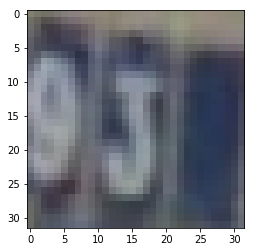

img sample label:  [3]


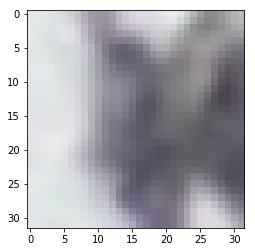

img sample label:  [1]


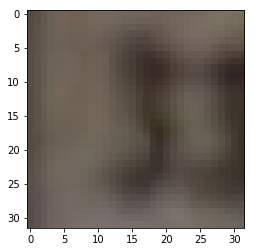

img sample label:  [3]


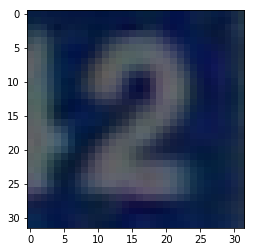

img sample label:  [2]


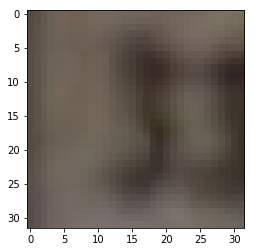

img sample label:  [3]


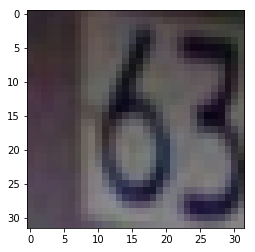

img sample label:  [6]


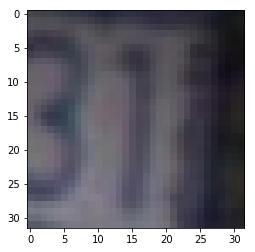

img sample label:  [1]


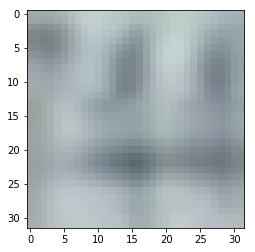

img sample label:  [4]


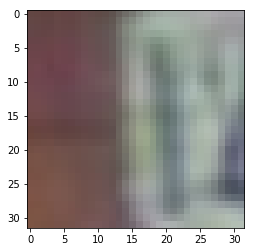

img sample label:  [1]


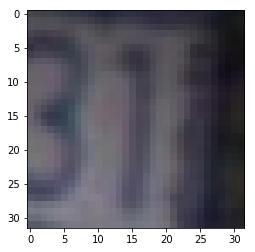

img sample label:  [1]


In [7]:
lenOfTrain = len(train_img_arr)
for x in range(10):
    randomInt = randint(0, lenOfTrain-1)
    plt.imshow(train_img_arr[:,:,:,randomInt])
    plt.show()
    print("img sample label: ", train_img_labels[randomInt])

In [8]:
# Converts input RBG array to grayscale equivalent

def convert_arr_to_gray(input_array):
    # get chape of train img arr 
    original_shape = np.shape(input_array)
    # create gray scale equivalent array with one channel. 
    # change the format to have the batch the first parm 
    img_arr_gray = np.zeros((original_shape[3], original_shape[0], original_shape[1], 1))
    for x in range(np.shape(input_array)[0]):
        for y in range(np.shape(input_array)[1]):
            # convert rbg to grayscale
            gray_arr = ((input_array[x][y][0] + input_array[x][y][1] + input_array[x][y][2]) / 3.0) / 255.
            # set it in output arr 
            img_arr_gray[:,x,y,0] = gray_arr
    print(img_arr_gray)
    return img_arr_gray

train_img_arr_gray = convert_arr_to_gray(train_img_arr)
print(f"shape: {np.shape(train_img_arr_gray)}")
test_img_arr_gray = convert_arr_to_gray(test_img_arr)

[[[[0.13202614]
   [0.0745098 ]
   [0.06666667]
   ...
   [0.25228758]
   [0.28235294]
   [0.29673203]]

  [[0.13333333]
   [0.07973856]
   [0.06666667]
   ...
   [0.16862745]
   [0.23137255]
   [0.28888889]]

  [[0.15555556]
   [0.08496732]
   [0.07320261]
   ...
   [0.12679739]
   [0.15816993]
   [0.25359477]]

  ...

  [[0.31633987]
   [0.31372549]
   [0.29542484]
   ...
   [0.05098039]
   [0.04444444]
   [0.03921569]]

  [[0.30588235]
   [0.30980392]
   [0.30065359]
   ...
   [0.05359477]
   [0.05228758]
   [0.05228758]]

  [[0.31503268]
   [0.31764706]
   [0.30196078]
   ...
   [0.06013072]
   [0.05751634]
   [0.04183007]]]


 [[[0.28627451]
   [0.29411765]
   [0.27581699]
   ...
   [0.30980392]
   [0.30326797]
   [0.30326797]]

  [[0.29150327]
   [0.2875817 ]
   [0.26405229]
   ...
   [0.30718954]
   [0.30980392]
   [0.30849673]]

  [[0.28627451]
   [0.27843137]
   [0.21568627]
   ...
   [0.31111111]
   [0.30980392]
   [0.30980392]]

  ...

  [[0.01830065]
   [0.01568627]
   [0.0

(73257, 32, 32, 1)


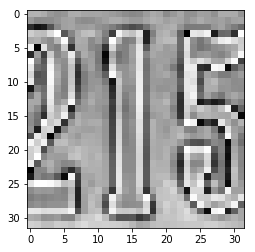

img sample label:  [1]


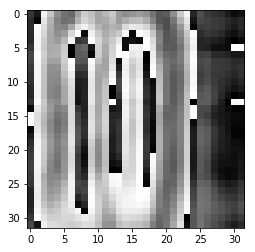

img sample label:  [10]


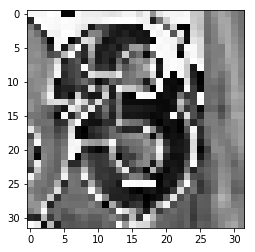

img sample label:  [3]


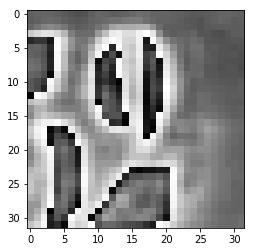

img sample label:  [2]


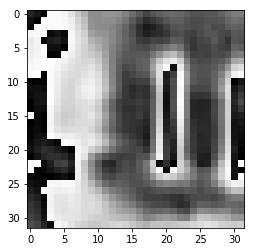

img sample label:  [1]


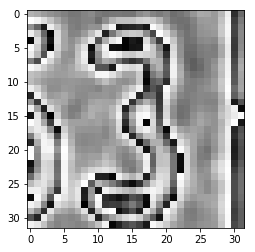

img sample label:  [3]


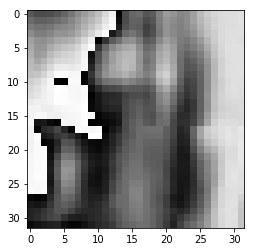

img sample label:  [7]


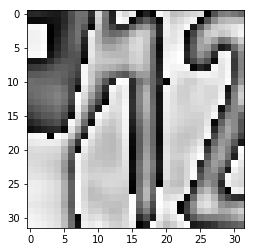

img sample label:  [1]


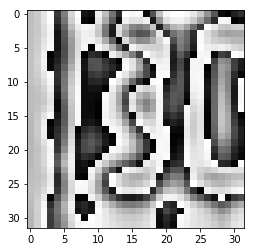

img sample label:  [3]


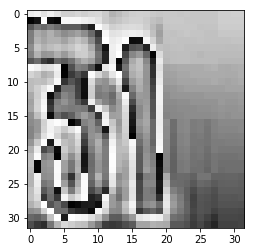

img sample label:  [1]


In [9]:
len_of_train_gray = len(train_img_arr_gray)
print(np.shape(train_img_arr_gray))
for x in range(10):
    randomInt = randint(0, len_of_train_gray-1)
    randomImage = train_img_arr_gray[randomInt,:,:,:]
    plt.imshow(randomImage[:,:,0], cmap='Greys')
    plt.show()
    print("img sample label: ", train_img_labels[randomInt])

## 2. MLP neural network classifier
* Build an MLP classifier model using the Sequential API. Your model should use only Flatten and Dense layers, with the final layer having a 10-way softmax output. 
* You should design and build the model yourself. Feel free to experiment with different MLP architectures. _Hint: to achieve a reasonable accuracy you won't need to use more than 4 or 5 layers._
* Print out the model summary (using the summary() method)
* Compile and train the model (we recommend a maximum of 30 epochs), making use of both training and validation sets during the training run. 
* Your model should track at least one appropriate metric, and use at least two callbacks during training, one of which should be a ModelCheckpoint callback.
* As a guide, you should aim to achieve a final categorical cross entropy training loss of less than 1.0 (the validation loss might be higher).
* Plot the learning curves for loss vs epoch and accuracy vs epoch for both training and validation sets.
* Compute and display the loss and accuracy of the trained model on the test set.

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Softmax
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [11]:
# Build the Sequential feedforward neural network model
def get_model(input_shape):
    model = Sequential([
        Flatten(input_shape=input_shape),
        Dense(128, activation='relu', name='layer_1'),
        Dense(64, activation='relu', name='layer_2'),
        Dense(32, activation='relu', name='layer_3'),
        Dense(11, activation='softmax', name='output_layer')
    ])
    return model

input_shape = (np.shape(train_img_arr_gray)[1], np.shape(train_img_arr_gray)[2], np.shape(train_img_arr_gray)[3]) 

model = get_model(input_shape)


In [12]:


# Print the model summary

model.summary()



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
layer_1 (Dense)              (None, 128)               131200    
_________________________________________________________________
layer_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
layer_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
output_layer (Dense)         (None, 11)                363       
Total params: 141,899
Trainable params: 141,899
Non-trainable params: 0
_________________________________________________________________


In [13]:
#compile the model
acc = tf.keras.metrics.SparseCategoricalAccuracy()

model.compile(optimizer="Adam", loss='sparse_categorical_crossentropy', metrics=[acc])

In [14]:
def get_checkpoint_best_only(checkpoint_best_path):
    """
    Create best checkpoint callback
    """
    checkpoint_best = ModelCheckpoint(filepath=checkpoint_best_path,
                                     save_weights_only=True,
                                     save_freq='epoch',
                                     monitor='sparse_categorical_accuracy',
                                     save_best_only=True,
                                     verbose=1)
    return checkpoint_best

def get_early_stopping():
    """
    Creates EarlyStopping callback that stops training when
    the validation (testing) accuracy has not improved in the last 3 epochs.
    """
    return EarlyStopping(patience=2, monitor='sparse_categorical_accuracy')

checkpoint_best_only_mlp = get_checkpoint_best_only('./checkpoints_mlp_best_only/checkpoint')
early_stopping_mlp = get_early_stopping()
callbacks_mlp = [checkpoint_best_only_mlp, early_stopping_mlp]

In [15]:
# Fit the model
history = model.fit(train_img_arr_gray, 
                    train_img_labels, 
                    validation_split=0.15, 
                    epochs=30, 
                    batch_size=32, 
                    verbose=2,
                    callbacks=callbacks_mlp)

Train on 62268 samples, validate on 10989 samples
Epoch 1/30

Epoch 00001: sparse_categorical_accuracy improved from -inf to 0.18893, saving model to ./checkpoints_mlp_best_only/checkpoint
62268/62268 - 37s - loss: 2.2414 - sparse_categorical_accuracy: 0.1889 - val_loss: 2.2139 - val_sparse_categorical_accuracy: 0.1921
Epoch 2/30

Epoch 00002: sparse_categorical_accuracy improved from 0.18893 to 0.23629, saving model to ./checkpoints_mlp_best_only/checkpoint
62268/62268 - 34s - loss: 2.1196 - sparse_categorical_accuracy: 0.2363 - val_loss: 2.0434 - val_sparse_categorical_accuracy: 0.2691
Epoch 3/30

Epoch 00003: sparse_categorical_accuracy improved from 0.23629 to 0.31213, saving model to ./checkpoints_mlp_best_only/checkpoint
62268/62268 - 31s - loss: 1.9637 - sparse_categorical_accuracy: 0.3121 - val_loss: 1.9090 - val_sparse_categorical_accuracy: 0.3425
Epoch 4/30

Epoch 00004: sparse_categorical_accuracy improved from 0.31213 to 0.35207, saving model to ./checkpoints_mlp_best_only/

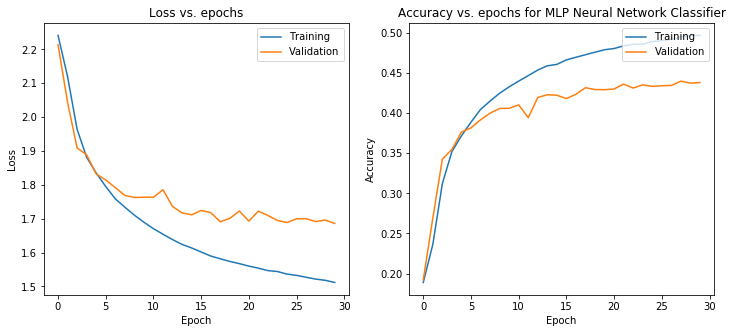

In [16]:
fig = plt.figure(figsize=(12, 5))

fig.add_subplot(121)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')

fig.add_subplot(122)

plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.title('Accuracy vs. epochs for MLP Neural Network Classifier')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')

plt.show()

In [17]:
test_loss, test_accuracy = model.evaluate(test_img_arr_gray, test_img_labels)
print(f"Test loss: {test_loss}")
print(f"Test accuracy: {test_accuracy}")

26032/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Test loss: 1.7333673450502796
Test accuracy: 0.4236324429512024


## 3. CNN neural network classifier
* Build a CNN classifier model using the Sequential API. Your model should use the Conv2D, MaxPool2D, BatchNormalization, Flatten, Dense and Dropout layers. The final layer should again have a 10-way softmax output. 
* You should design and build the model yourself. Feel free to experiment with different CNN architectures. _Hint: to achieve a reasonable accuracy you won't need to use more than 2 or 3 convolutional layers and 2 fully connected layers.)_
* The CNN model should use fewer trainable parameters than your MLP model.
* Compile and train the model (we recommend a maximum of 30 epochs), making use of both training and validation sets during the training run.
* Your model should track at least one appropriate metric, and use at least two callbacks during training, one of which should be a ModelCheckpoint callback.
* You should aim to beat the MLP model performance with fewer parameters!
* Plot the learning curves for loss vs epoch and accuracy vs epoch for both training and validation sets.
* Compute and display the loss and accuracy of the trained model on the test set.

In [18]:
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Dropout
from tensorflow.keras import regularizers

In [19]:


def create_model_cnn(input_shape, wd, rate):
    model = Sequential([
          Conv2D(32, (3,3), activation='relu', padding='SAME', input_shape=input_shape),
          MaxPooling2D((2,2)),
          Dense(32, kernel_regularizer=regularizers.l2(wd), activation='relu'),
          BatchNormalization(),
          Dropout(rate),
          Dense(16, kernel_regularizer=regularizers.l2(wd), activation='relu'),
          Flatten(),
          Dense(11, activation='softmax', name='output_layer')])
    return model
# create the CNN model
model_cnn = create_model_cnn(input_shape, 1e-5, 0.3)
# Print the model summary
model_cnn.summary()



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dense (Dense)                (None, 16, 16, 32)        1056      
_________________________________________________________________
batch_normalization (BatchNo (None, 16, 16, 32)        128       
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
dense_1 (Dense)              (None, 16, 16, 16)        528       
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)             

In [20]:


acc = tf.keras.metrics.SparseCategoricalAccuracy()
model_cnn.compile(optimizer="Adam", loss='sparse_categorical_crossentropy', metrics=[acc])
# callbacks 
checkpoint_best_only_cnn = get_checkpoint_best_only('./checkpoints_cnn_best_only/checkpoint')
early_stopping_cnn = get_early_stopping()
callbacks_cnn = [checkpoint_best_only_cnn, early_stopping_cnn]



In [21]:
# Fit the model
history_acc = model_cnn.fit(train_img_arr_gray, 
                    train_img_labels, 
                    validation_split=0.15, 
                    epochs=30, 
                    batch_size=64, 
                    verbose=2,
                    callbacks=callbacks_cnn)

Train on 62268 samples, validate on 10989 samples
Epoch 1/30

Epoch 00001: sparse_categorical_accuracy improved from -inf to 0.67097, saving model to ./checkpoints_cnn_best_only/checkpoint
62268/62268 - 275s - loss: 1.0242 - sparse_categorical_accuracy: 0.6710 - val_loss: 0.6963 - val_sparse_categorical_accuracy: 0.7883
Epoch 2/30

Epoch 00002: sparse_categorical_accuracy improved from 0.67097 to 0.78906, saving model to ./checkpoints_cnn_best_only/checkpoint
62268/62268 - 274s - loss: 0.6888 - sparse_categorical_accuracy: 0.7891 - val_loss: 0.6826 - val_sparse_categorical_accuracy: 0.7907
Epoch 3/30

Epoch 00003: sparse_categorical_accuracy improved from 0.78906 to 0.80518, saving model to ./checkpoints_cnn_best_only/checkpoint
62268/62268 - 272s - loss: 0.6406 - sparse_categorical_accuracy: 0.8052 - val_loss: 0.7055 - val_sparse_categorical_accuracy: 0.7837
Epoch 4/30

Epoch 00004: sparse_categorical_accuracy improved from 0.80518 to 0.81342, saving model to ./checkpoints_cnn_best_on

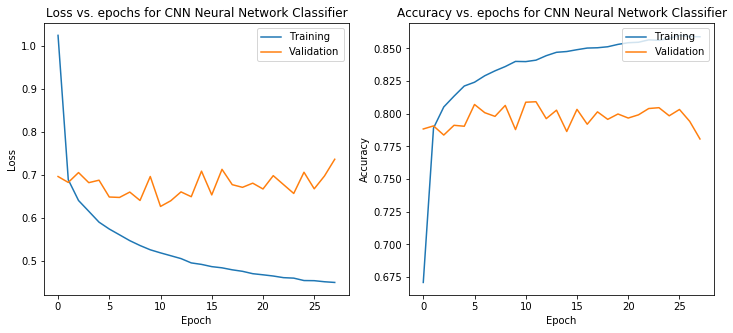

In [22]:
fig = plt.figure(figsize=(12, 5))

fig.add_subplot(121)

plt.plot(history_acc.history['loss'])
plt.plot(history_acc.history['val_loss'])
plt.title('Loss vs. epochs for CNN Neural Network Classifier')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')

fig.add_subplot(122)

plt.plot(history_acc.history['sparse_categorical_accuracy'])
plt.plot(history_acc.history['val_sparse_categorical_accuracy'])
plt.title('Accuracy vs. epochs for CNN Neural Network Classifier')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')

plt.show()

In [23]:
# Compute and display the loss and accuracy of the trained model on the test set.
test_loss, test_accuracy = model_cnn.evaluate(test_img_arr_gray, test_img_labels)
print(f"Test loss: {test_loss}")
print(f"Test accuracy: {test_accuracy}")

26032/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Test loss: 0.805103342776366
Test accuracy: 0.7624077796936035


## 4. Get model predictions
* Load the best weights for the MLP and CNN models that you saved during the training run.
* Randomly select 5 images and corresponding labels from the test set and display the images with their labels.
* Alongside the image and label, show each model’s predictive distribution as a bar chart, and the final model prediction given by the label with maximum probability.

In [25]:
# get best weights for the MLP model 
model.load_weights('checkpoints_mlp_best_only/checkpoint')
# get the beset weights for the CNN model
model_cnn.load_weights('checkpoints_cnn_best_only/checkpoint')

In [26]:
# get MLP and CNN model predictions on randomly selected test images

num_test_images = test_img_arr_gray.shape[0]

random_inx = np.random.choice(num_test_images, 5)
random_test_images_gray = test_img_arr_gray[random_inx, ...]
random_test_labels = test_img_labels[random_inx, ...]

predictions_mlp = model.predict(random_test_images_gray)
predictions_cnn = model_cnn.predict(random_test_images_gray)

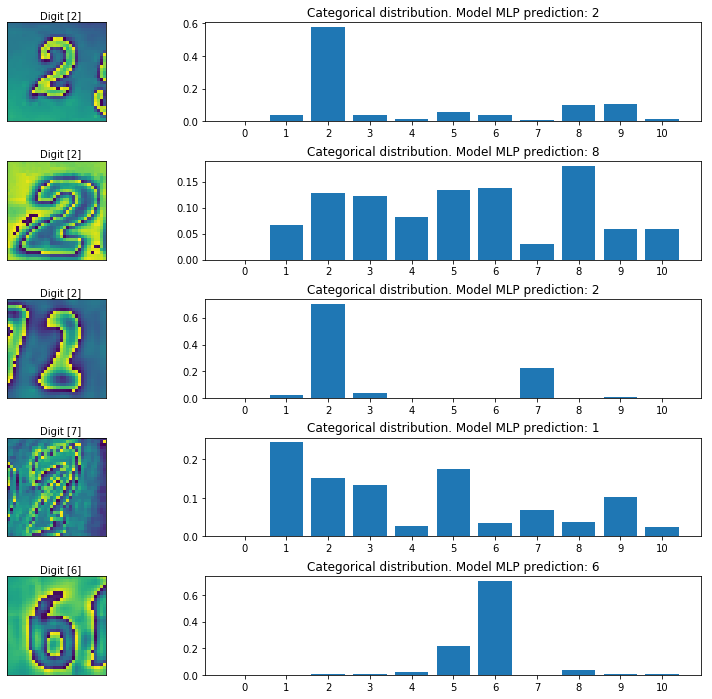

In [27]:
# MLP predictions 
fig, axes = plt.subplots(5, 2, figsize=(16, 12))

fig.subplots_adjust(hspace=0.4, wspace=-0.2)

for i, (prediction_mlp, image, label) in enumerate(zip(predictions_mlp, random_test_images_gray, random_test_labels)):
    axes[i, 0].imshow(np.squeeze(image))
    axes[i, 0].get_xaxis().set_visible(False)
    axes[i, 0].get_yaxis().set_visible(False)
    axes[i, 0].text(10., -1.5, f'Digit {label}')
    axes[i, 1].bar(np.arange(len(prediction_mlp)), prediction_mlp)
    axes[i, 1].set_xticks(np.arange(len(prediction_mlp)))
    axes[i, 1].set_title(f"Categorical distribution. Model MLP prediction: {np.argmax(prediction_mlp)}")
    
plt.show()

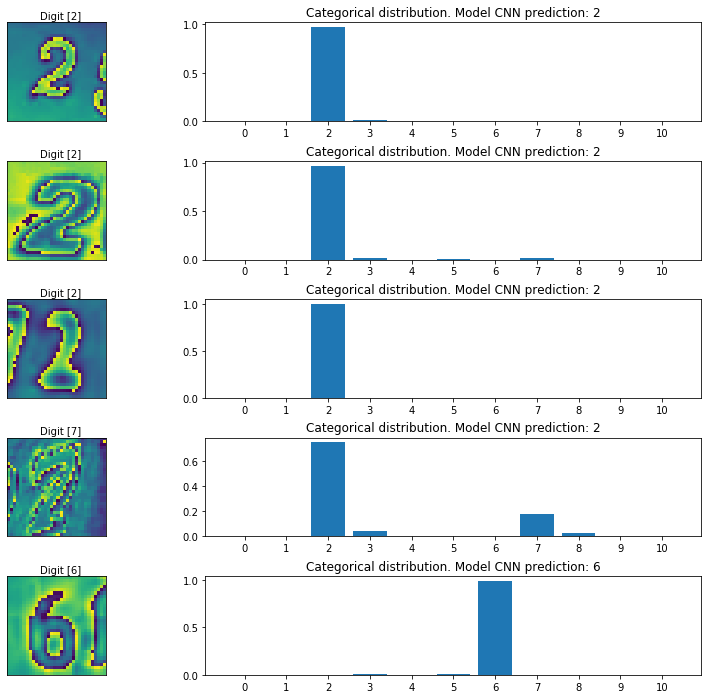

In [28]:
# CNN predictions 
fig, axes = plt.subplots(5, 2, figsize=(16, 12))

fig.subplots_adjust(hspace=0.4, wspace=-0.2)

for i, (prediction_cnn, image, label) in enumerate(zip(predictions_cnn, random_test_images_gray, random_test_labels)):
    axes[i, 0].imshow(np.squeeze(image))
    axes[i, 0].get_xaxis().set_visible(False)
    axes[i, 0].get_yaxis().set_visible(False)
    axes[i, 0].text(10., -1.5, f'Digit {label}')
    axes[i, 1].bar(np.arange(len(prediction_cnn)), prediction_cnn)
    axes[i, 1].set_xticks(np.arange(len(prediction_cnn)))
    axes[i, 1].set_title(f"Categorical distribution. Model CNN prediction: {np.argmax(prediction_cnn)}")
    
plt.show()